In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
from pandas.io.json import json_normalize
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.tools as tls
%matplotlib inline

In [2]:
raw_data= pd.read_csv("data/kickstarter.csv")

In [3]:
raw_data.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set
0,805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
1,1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
2,1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False
3,658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False
4,1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False


In [54]:
raw_data.shape

(60000, 27)

In [55]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      60000 non-null  int64  
 1   photo                   60000 non-null  object 
 2   name                    59998 non-null  object 
 3   blurb                   59998 non-null  object 
 4   goal                    60000 non-null  float64
 5   slug                    60000 non-null  object 
 6   disable_communication   60000 non-null  bool   
 7   country                 60000 non-null  object 
 8   currency                60000 non-null  object 
 9   currency_symbol         60000 non-null  object 
 10  currency_trailing_code  60000 non-null  bool   
 11  deadline                60000 non-null  int64  
 12  created_at              60000 non-null  int64  
 13  launched_at             60000 non-null  int64  
 14  static_usd_rate         60000 non-null

In [22]:
raw_data.isnull().sum()

id                            0
photo                         0
name                          2
blurb                         2
goal                          0
slug                          0
disable_communication         0
country                       0
currency                      0
currency_symbol               0
currency_trailing_code        0
deadline                      0
created_at                    0
launched_at                   0
static_usd_rate               0
creator                       0
location                    271
category                      0
profile                       0
urls                          0
source_url                    0
friends                   59988
is_starred                59988
is_backing                59988
permissions               59988
state                     10000
evaluation_set                0
dtype: int64

In [7]:
raw_data["category"][1]

'{"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/publishing/nonfiction"}},"color":14867664,"parent_id":18,"name":"Nonfiction","id":48,"position":9,"slug":"publishing/nonfiction"}'

## Feature Engineering

In [4]:
df = raw_data.copy()

In [5]:
#converting UNIX time to pandas datetime
df['deadline'] = pd.to_datetime(df['deadline'], unit='s')
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
df['campaign length'] = (df['deadline'] - df['launched_at']).astype('timedelta64[D]')

In [6]:
#displaying all the columns
pd.set_option('display.max_columns', None)
df.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,campaign length
0,805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,28.0
1,1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,True,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0
2,1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,21.0
3,658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,False,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,1.680079,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,43.0
4,1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,True,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0


In [7]:
#extracting features from category and profile columns
df["main_category"] = json_normalize(df.category.apply(json.loads))["slug"].str.split("/").str[0]
df["sub_category"] = json_normalize(df.category.apply(json.loads))["name"]
df["category_id"] = json_normalize(df.category.apply(json.loads))["id"]
df["category_position"] = json_normalize(df.category.apply(json.loads))["position"]
df["category_parent_id"] = json_normalize(df.category.apply(json.loads))["parent_id"] 
df["profile_state"] = json_normalize(df.profile.apply(json.loads))["state"]

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

/anaconda3/envs/ads03/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use panda

In [8]:
#deleting original category and profile columns
del df['category']
del df['profile']

In [18]:
df.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,campaign length,main_category,sub_category,category_id,category_position,category_parent_id,profile_state
0,805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,28.0,film & video,Movie Theaters,298,11,11,inactive
1,1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,True,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,publishing,Nonfiction,48,9,18,inactive
2,1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,21.0,music,Country & Folk,37,5,14,inactive
3,658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,False,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,1.680079,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,43.0,film & video,Documentary,30,4,11,inactive
4,1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,True,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,film & video,Narrative Film,31,13,11,inactive


In [9]:
#convert goal column into goal_USD, then apply log transformation
df["goal_USD"] = np.log(df.goal * df.static_usd_rate)

In [10]:
del df['goal']
del df['static_usd_rate']

In [31]:
df.head()

,id,photo,name,blurb,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,creator,location,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,campaign length,main_category,sub_category,category_id,category_position,category_parent_id,profile_state,goal_USD
0,805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,28.0,film & video,Movie Theaters,298,11,11,inactive,11.736069
1,1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,american-politics-policy-power-and-profit,False,US,USD,$,True,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,publishing,Nonfiction,48,9,18,inactive,9.190138
2,1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,21.0,music,Country & Folk,37,5,14,inactive,7.824046
3,658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,still-loved,False,GB,GBP,Â£,False,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,43.0,film & video,Documentary,30,4,11,inactive,9.729181
4,1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,nine-blackmons-hater-film-project,False,US,USD,$,True,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,film & video,Narrative Film,31,13,11,inactive,8.612503


# Visualising the data

In [11]:
df["evaluation_set"].value_counts()

False    50000
True     10000
Name: evaluation_set, dtype: int64

In [12]:
mask = df.evaluation_set

In [12]:
#predicting on these values
df[mask].shape

(10000, 27)

In [39]:
df[mask].head()

,id,photo,name,blurb,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,creator,location,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,campaign length,main_category,sub_category,category_id,category_position,category_parent_id,profile_state,goal_USD
50000,1569898085,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Honeycomb Farm-to-Cupcakes,Gourmet cupcakes made with high quality pastur...,honeycomb-farm-to-table-cupcakes,False,US,USD,$,True,2016-01-15 05:00:00,2015-12-08 12:37:02,2015-12-08 13:20:43,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True,37.0,food,Events,308,5,10,inactive,7.600902
50001,308824265,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Melted Crayons Entertainment,Entertainment platform for aspiring artists of...,melted-crayons-entertainment,False,CA,CAD,$,True,2016-04-16 07:28:54,2016-02-16 00:02:58,2016-02-16 08:28:54,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True,59.0,music,Electronic Music,38,6,14,inactive,7.277685
50002,341566518,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",YouTube,A creative mind without the right tools to vis...,youtube-0,False,US,USD,$,True,2014-10-02 16:43:58,2014-09-02 00:52:13,2014-09-02 16:43:58,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True,30.0,film & video,Webseries,33,19,11,inactive,7.377759
50003,898202473,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","A book by Tiny House, Tiny Footprint","Roll with Kathleen, Greg + Blaize in a Camper ...",a-book-by-tiny-house-tiny-footprint,False,US,USD,$,True,2016-11-09 13:52:52,2016-10-02 23:07:29,2016-10-10 12:52:52,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True,30.0,journalism,Print,359,3,13,active,9.210340
50004,1383882757,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",CUBIE,"CUBIE lives. I want to ramp up funds to $2,00...",cubie,False,US,USD,$,True,2012-10-28 19:26:55,2012-09-27 17:47:57,2012-10-08 19:26:55,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True,20.0,art,Sculpture,25,10,1,inactive,5.298317


In [37]:
df[~mask].shape

(50000, 31)

In [13]:
mask_eval = df[~mask]

In [34]:
mask_eval.head()

,id,photo,name,blurb,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,creator,location,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,campaign length,main_category,sub_category,category_id,category_position,category_parent_id,profile_state,goal_USD
0,805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,28.0,film & video,Movie Theaters,298,11,11,inactive,11.736069
1,1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,american-politics-policy-power-and-profit,False,US,USD,$,True,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,publishing,Nonfiction,48,9,18,inactive,9.190138
2,1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,21.0,music,Country & Folk,37,5,14,inactive,7.824046
3,658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,still-loved,False,GB,GBP,Â£,False,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,43.0,film & video,Documentary,30,4,11,inactive,9.729181
4,1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,nine-blackmons-hater-film-project,False,US,USD,$,True,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,30.0,film & video,Narrative Film,31,13,11,inactive,8.612503


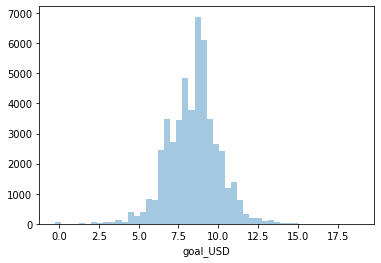

In [17]:
sns.distplot(mask_eval["goal_USD"],kde=False)

In [14]:
country = round(mask_eval["country"].value_counts() / len(mask_eval["country"]) * 100,2)

labels = list(country.index)
values = list(country.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribuition of Countries', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [15]:
#Grouping the data
main_cats = mask_eval["main_category"].value_counts()
main_cats_failed = mask_eval[mask_eval["state"] == 0]["main_category"].value_counts()
main_cats_sucess = mask_eval[mask_eval["state"] == 1]["main_category"].value_counts()


#First plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Failed Categories"
)
#Second plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Success Categories"
)
#Third plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="Categories Distribuition"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True,
                     title="Main Category's Distribuition",
                     bargap=0.05,height=700, width=900)
iplot(fig)

/anaconda3/envs/ads03/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [16]:
df_failed = mask_eval[mask_eval["state"] == 0]
df_sucess = mask_eval[mask_eval["state"] == 1]


# Add histogram data
failed = df_failed['goal_USD']
success = df_sucess["goal_USD"]

trace1 = go.Histogram(
    x=failed,
    opacity=0.60, nbinsx=30, name='Goals Failed', histnorm='probability'
)
trace2 = go.Histogram(
    x=success,
    opacity=0.60, nbinsx=30, name='Goals Sucessful', histnorm='probability'
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',title="Distribuitions",height=500, width=900)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

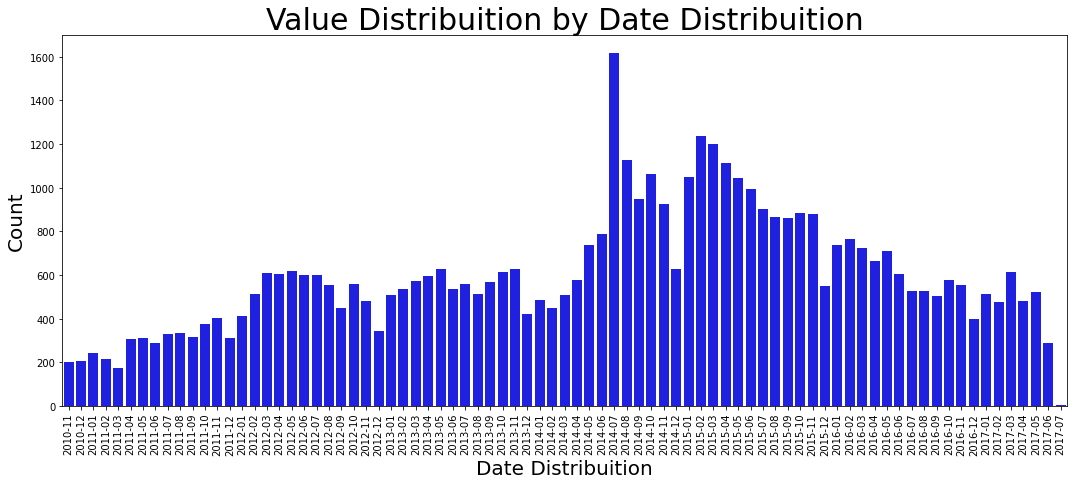

In [78]:
#Extracting month and year project is launched
mask_eval['launched_at'] = mask_eval['launched_at'].dt.to_period('M').astype(str)


#Adding histogram
plt.figure(figsize = (18,15))

g1 = plt.subplot(211)
g1 = sns.countplot(x="launched_at", data=mask_eval, color='blue',
                   order=mask_eval['launched_at'].value_counts().index.sort_values()[19:] )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

plt.show()

## Selecting the main features based on high level knowledge

In [356]:
main_columns = ['name', 'blurb','goal_USD' , 'country', "category_id",
                "category_position", "category_parent_id",
                'profile_state', 'state','evaluation_set']  

In [ ]:
main_columns

In [358]:
selected_df = df[]

In [359]:
selected_df.head()

,name,blurb,goal_USD,country,category_id,category_position,category_parent_id,profile_state,state,evaluation_set
0,DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,11.736069,US,298,11,11,inactive,0.0,False
1,"American Politics, Policy, Power and Profit",Everything you should know about really big go...,9.190138,US,48,9,18,inactive,0.0,False
2,"Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",7.824046,US,37,5,14,inactive,1.0,False
3,Still Loved,When their dreams are shattered by the loss of...,9.729181,GB,30,4,11,inactive,1.0,False
4,Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,8.612503,US,31,13,11,inactive,0.0,False


In [327]:
#finding length of blurbs and names 
selected_df['blurb_length'] = selected_df['blurb'].str.len().fillna(0)
selected_df['name_length'] = selected_df['name'].str.len().fillna(0)

<ipython-input-327-2af01897740d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['blurb_length'] = selected_df['blurb'].str.len().fillna(0)
<ipython-input-327-2af01897740d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['name_length'] = selected_df['name'].str.len().fillna(0)


In [360]:
del selected_df['blurb']
del selected_df['name']

In [361]:
selected_df.head()

,goal_USD,country,category_id,category_position,category_parent_id,profile_state,state,evaluation_set
0,11.736069,US,298,11,11,inactive,0.0,False
1,9.190138,US,48,9,18,inactive,0.0,False
2,7.824046,US,37,5,14,inactive,1.0,False
3,9.729181,GB,30,4,11,inactive,1.0,False
4,8.612503,US,31,13,11,inactive,0.0,False


In [362]:
def custom_one_hot_encode(df, column, categories):
    for category in categories:
        df[f'{column}_{category}'] = (df[column] == category) * 1
    del df[column]

In [363]:
preprocessed_df = selected_df.copy()

In [364]:
custom_one_hot_encode(preprocessed_df, 'profile_state', ['inactive', 'active'])

In [365]:
countries = ['US', 'GB', 'CA', 'DK', 'AU', 'IT', 'NZ', 'DE', 'ES', 'AT', 
             'IE', 'NL', 'SE', 'MX', 'FR', 'BE', 'NO', 'CH', 'SG', 'HK', 'LU']

In [366]:
custom_one_hot_encode(preprocessed_df, 'country', countries)

## Creating model

In [367]:
preprocessed_df.head()

,goal_USD,category_id,category_position,category_parent_id,state,evaluation_set,profile_state_inactive,profile_state_active,country_US,country_GB,country_CA,country_DK,country_AU,country_IT,country_NZ,country_DE,country_ES,country_AT,country_IE,country_NL,country_SE,country_MX,country_FR,country_BE,country_NO,country_CH,country_SG,country_HK,country_LU
0,11.736069,298,11,11,0.0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.190138,48,9,18,0.0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.824046,37,5,14,1.0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.729181,30,4,11,1.0,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.612503,31,13,11,0.0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [336]:
preprocessed_df.isnull().sum()

goal_USD                      0
category_id                   0
category_position             0
category_parent_id            0
state                     10000
evaluation_set                0
blurb_length                  0
name_length                   0
profile_state_inactive        0
profile_state_active          0
country_US                    0
country_GB                    0
country_CA                    0
country_DK                    0
country_AU                    0
country_IT                    0
country_NZ                    0
country_DE                    0
country_ES                    0
country_AT                    0
country_IE                    0
country_NL                    0
country_SE                    0
country_MX                    0
country_FR                    0
country_BE                    0
country_NO                    0
country_CH                    0
country_SG                    0
country_HK                    0
country_LU                    0
dtype: i

In [368]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [338]:
preprocessed_df = preprocessed_df[preprocessed_df.evaluation_set == False]
del preprocessed_df['evaluation_set']

In [369]:
msk_eval = df.evaluation_set

In [375]:
preprocessed_df[msk_eval]['state'].nunique()

0

In [376]:
preprocessed_df[~msk_eval]['state']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
49995    1.0
49996    1.0
49997    1.0
49998    1.0
49999    1.0
Name: state, Length: 50000, dtype: float64

In [377]:
X_train = preprocessed_df[~msk_eval]
y_train = preprocessed_df[~msk_eval]['state']

In [339]:
scaler = StandardScaler()
scaler.fit(preprocessed_df)

scaled_df = scaler.transform(preprocessed_df)

In [341]:
y.shape

(50000,)

In [342]:
X.shape

(50000, 29)

In [343]:
parameters = {'max_depth': [3,5,7,10]}
dtc = DecisionTreeClassifier()
gridsearch_cv = GridSearchCV(dtc, parameters, scoring='accuracy')
result = gridsearch_cv.fit(X, y)
result

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10]}, scoring='accuracy')

In [344]:
pd.DataFrame(result.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.118377,0.004138,0.002912,0.000417,10,{'max_depth': 10},0.7657,0.7524,0.7619,0.7596,0.7585,0.75962,0.004371,1
2,0.094802,0.001320,0.002375,0.000100,7,{'max_depth': 7},0.7603,0.7512,0.7537,0.7512,0.7547,0.75422,0.003338,2
1,0.074580,0.002617,0.002554,0.000286,5,{'max_depth': 5},0.7287,0.7169,0.7177,0.7169,0.7275,0.72154,0.005378,3
0,0.053305,0.006646,0.002214,0.000230,3,{'max_depth': 3},0.6916,0.6851,0.6880,0.6860,0.6994,0.69002,0.005195,4


In [345]:
pd.DataFrame( { 'feature': feature_names, 'importance': result.best_estimator_.feature_importances_ } ).sort_values(by='importance', ascending=False)

,feature,importance
1,category_id,0.338498
7,profile_state_active,0.285903
2,category_position,0.214555
0,goal_USD,0.115077
5,name_length,0.025850
4,blurb_length,0.009590
3,category_parent_id,0.004764
8,country_US,0.002895
9,country_GB,0.000835
12,country_AU,0.000574
